In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50-startups-data/50_Startups.csv


In [3]:
data=pd.read_csv('../input/50-startups-data/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


Mean and 50% (Median) have similar values for RND, ADMIN and MKT. Hence we have good quality data

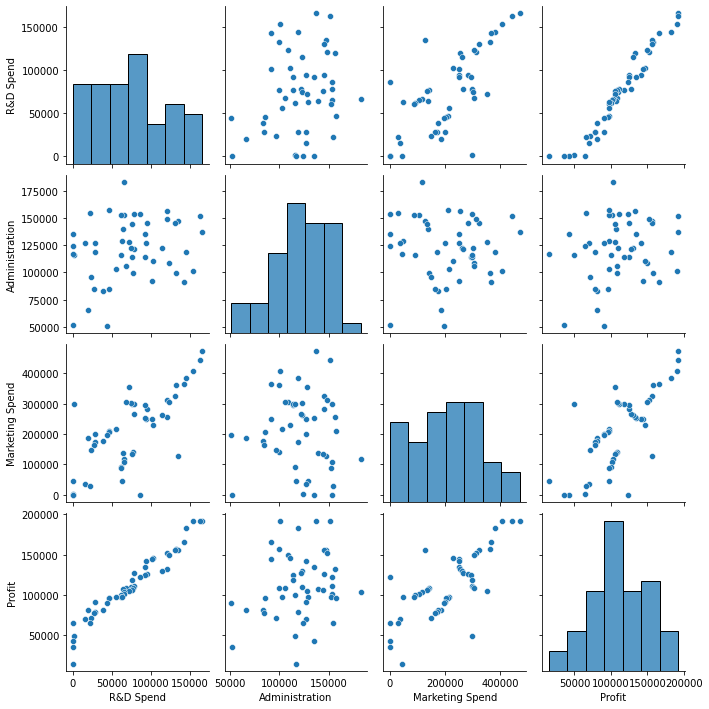

In [6]:
sns.pairplot(data)

Positive correlation can be seen between RND and MKT and Profit

<AxesSubplot:>

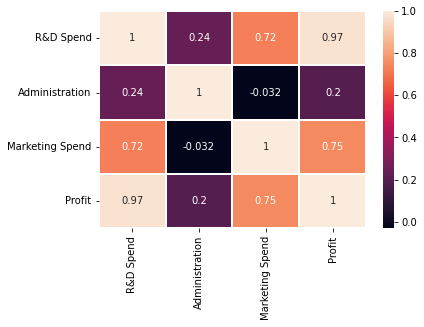

In [7]:
sns.heatmap(data.corr(), annot=True, linewidth=2)

In [8]:
#check duplicate rows
data.drop_duplicates(inplace=True)
#Reset the index
#1. Creating new index array
indexColArray = np.array(list(range(0, len(data))))

#2. Assign the above array to my df
data.set_index(indexColArray, inplace=True)
indexColArray = np.array(list(range(0,len(data))))
indexColArray

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

No duplicate rows

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


RND,ADMIN and MKT - Numerical Continuous Data - float
STATE - Categorical Data - object

In [10]:
data = data.rename(columns = {'R&D Spend': 'RND', 'Administration': 'ADMIN', 'Marketing Spend': 'MKT'}, inplace = False)

Checking Non-Negative Values in Numeric Data

In [11]:
data.RND.loc[data.RND<0]=np.nan
data.ADMIN.loc[data.ADMIN<0]=np.nan
data.MKT.loc[data.MKT<0]=np.nan

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Checking unique values for STATE

In [12]:
data.State.unique()
#no spelling mistakes
#no invalid data

array(['New York', 'California', 'Florida'], dtype=object)

Label Encoding for STATE

In [13]:
le=pd.get_dummies(data.State)
newdata=pd.concat([le,data.iloc[:,[0,1,2,4]]], axis =1 )
newdata.head()

,California,Florida,New York,RND,ADMIN,MKT,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

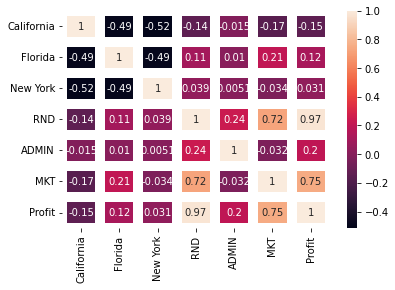

In [14]:
sns.heatmap(newdata.corr(), annot=True, linewidth=10)

Simple Linear Regression

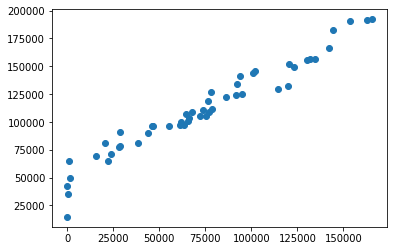

In [15]:
#RND vs PROFIT
X=newdata.iloc[:,[3]].values
y=newdata.iloc[:,[-1]].values
plt.scatter(X,y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=1/3, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred=reg.predict(X_test)

In [19]:
import matplotlib.pyplot as plt

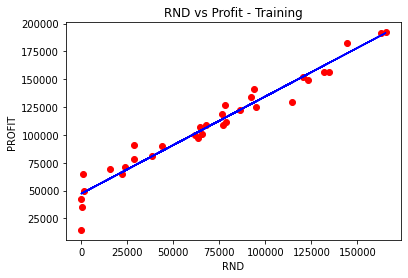

In [20]:
#visualize training data
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("RND vs Profit - Training")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.show()

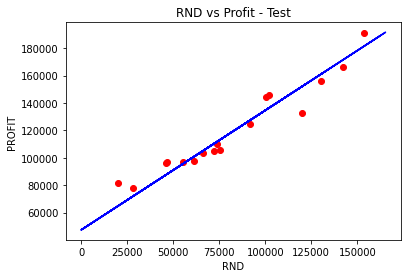

In [21]:
#visualize test data
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("RND vs Profit - Test")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.show()

In [22]:

trainacc=round(reg.score(X_train,y_train)*100,2)
testacc=round(reg.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 95.13%
Test Accuracy: 92.09%
Model is Overfitting


In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,y_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is 0.9209
mean_sqrd_error is== 75085549.7617
root_mean_squared error of is== 8665.191847945045


In [24]:
newdata.head()

,California,Florida,New York,RND,ADMIN,MKT,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


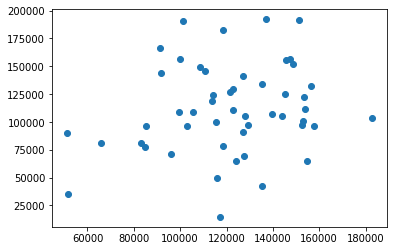

In [25]:
#ADMIN vs PROFIT
Xa=newdata.iloc[:,[4]].values
plt.scatter(Xa,y)

In [26]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train,ya_test = train_test_split(Xa,y, test_size=1/3, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(Xa_train, ya_train)

LinearRegression()

In [28]:
ya_pred=reg.predict(Xa_test)

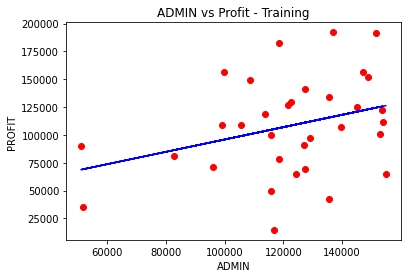

In [29]:
#visualize training data
plt.scatter(Xa_train,ya_train,color = 'red')
plt.plot(Xa_train,reg.predict(Xa_train),color='blue')
plt.title("ADMIN vs Profit - Training")
plt.xlabel("ADMIN")
plt.ylabel("PROFIT")
plt.show()

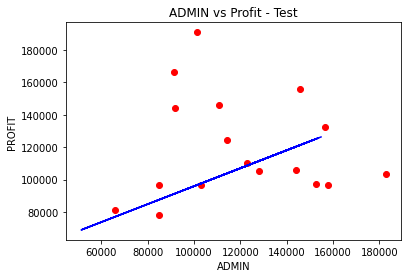

In [30]:
#visualize test data
plt.scatter(Xa_test,ya_test,color = 'red')
plt.plot(Xa_train,reg.predict(Xa_train),color='blue')
plt.title("ADMIN vs Profit - Test")
plt.xlabel("ADMIN")
plt.ylabel("PROFIT")
plt.show()

In [31]:
trainacc=round(reg.score(Xa_train,ya_train)*100,2)
testacc=round(reg.score(Xa_test,ya_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')

Training Accuracy: 10.72%
Test Accuracy: -52.83%


In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(ya_test,ya_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(ya_test,ya_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(ya_test,ya_pred)))

r2 score is -0.5283
mean_sqrd_error is== 1450076211.2602
root_mean_squared error of is== 38079.86621904332


MKT vs PROFIT

In [33]:
newdata.head()

,California,Florida,New York,RND,ADMIN,MKT,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


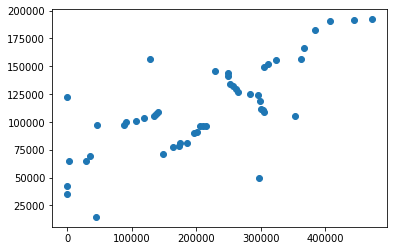

In [34]:
Xm=newdata.iloc[:,[5]].values
plt.scatter(Xm,y)

In [35]:
from sklearn.model_selection import train_test_split
Xm_train,Xm_test, ym_train,ym_test=train_test_split(Xm,y,test_size=1/3, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(Xm_train,ym_train)

LinearRegression()

In [37]:
ym_pred=reg.predict(Xm_test)

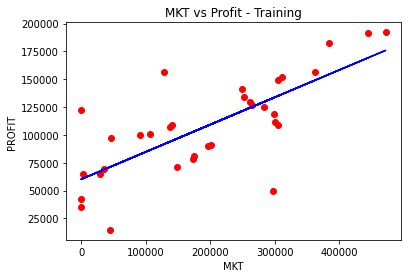

In [38]:
#visualize training data
plt.scatter(Xm_train,ym_train,color = 'red')
plt.plot(Xm_train,reg.predict(Xm_train),color='blue')
plt.title("MKT vs Profit - Training")
plt.xlabel("MKT")
plt.ylabel("PROFIT")
plt.show()

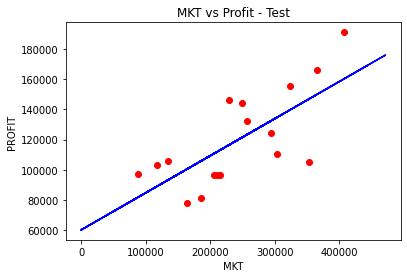

In [39]:
#visualize test data
plt.scatter(Xm_test,ym_test,color = 'red')
plt.plot(Xm_train,reg.predict(Xm_train),color='blue')
plt.title("MKT vs Profit - Test")
plt.xlabel("MKT")
plt.ylabel("PROFIT")
plt.show()

In [40]:
trainacc=round(reg.score(Xm_train,ym_train)*100,2)
testacc=round(reg.score(Xm_test,ym_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')

Training Accuracy: 55.96%
Test Accuracy: 51.81%


In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(ym_test,ym_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(ym_test,ym_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(ym_test,ym_pred)))

r2 score is 0.5181
mean_sqrd_error is== 457228472.7164
root_mean_squared error of is== 21382.901410154387


Multiple Linear Regression

In [42]:
newdata.head()

,California,Florida,New York,RND,ADMIN,MKT,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [43]:
XM=newdata.iloc[:,[0,1,2,3,5]].values
#drop admin no correlation

In [44]:
from sklearn.model_selection import train_test_split
XM_train,XM_test, yM_train,yM_test=train_test_split(XM,y,test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(XM_train, yM_train)

LinearRegression()

In [46]:
yM_pred = regressor.predict(XM_test)
np.set_printoptions(precision=2)
print(np.concatenate((yM_pred.reshape(len(yM_pred),1), yM_test.reshape(len(yM_test),1)),1))

[[101374.28 103282.38]
 [133851.24 144259.4 ]
 [133300.28 146121.95]
 [ 72987.32  77798.83]
 [179827.91 191050.39]
 [115491.25 105008.31]
 [ 69057.75  81229.06]
 [ 97880.01  97483.56]
 [113898.44 110352.25]
 [169510.76 166187.94]]


In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(yM_test,yM_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(yM_test,yM_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(yM_test,yM_pred)))

r2 score is 0.9447
mean_sqrd_error is== 70726699.1448
root_mean_squared error of is== 8409.916714495785
